In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
from sklearn.model_selection import train_test_split

X = df_diabetes.loc[:,(df_diabetes.columns != 'target')]
y = df_diabetes['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.33, 
                                                      random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
clf = LinearRegression()
model = GridSearchCV(estimator=clf, 
                     param_grid={                         
                         'normalize':[True, False],
                     }, 
                     cv=10, #10-Fold CrossValidation
                     n_jobs=2, 
                     scoring='r2')
model.fit(X_train, y_train)
print()
print(model.best_params_)
print('R² %.2f%%' % (model.best_score_*100))


{'normalize': False}
R² 41.67%


In [7]:
import numpy as np
predictions = model.predict(X_valid)
print('R² %.2f%%' % (model.score(X_valid, y_valid)*100))

R² 51.04%


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean square error: %.2f'
      % mean_squared_error(y_valid, predictions))

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R²): %.2f%%'
      % (r2_score(y_valid, predictions)*100))

Mean square error: 2817.80
Mean absolute error: 41.96
Coefficient of determination (R²): 51.04%


# Comparando Real e Predito

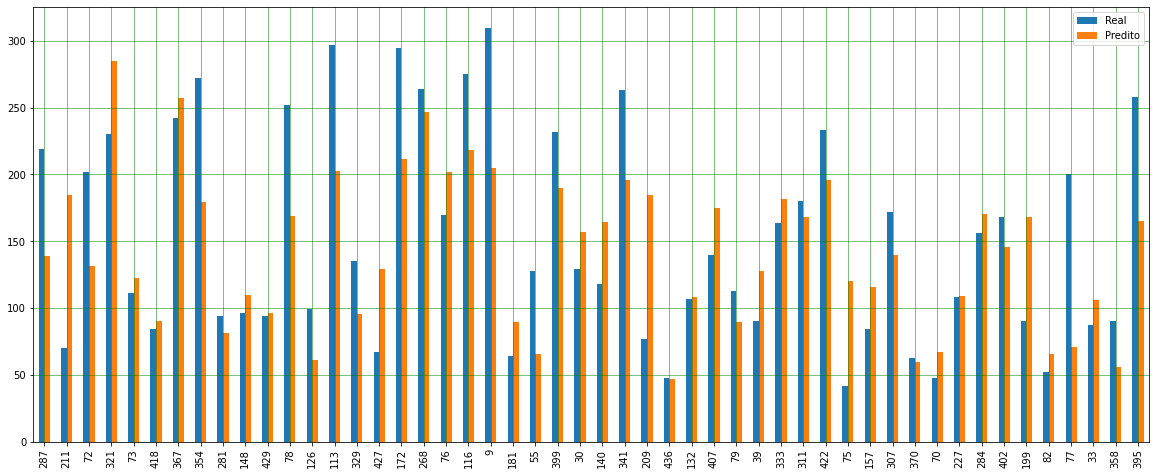

In [9]:
df = pd.DataFrame({'Real': y_valid, 'Predito': predictions}).head(50)
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Redução para Visualização

In [10]:
from sklearn.decomposition import PCA
pca_diabetes = PCA(n_components=2)
principalComponents_diabetes = pca_diabetes.fit_transform(X_valid)

In [11]:
principal_diabetes_Df = pd.DataFrame(data = principalComponents_diabetes
             , columns = ['principal component 1', 'principal component 2'])
principal_diabetes_Df['y'] = y_valid
principal_diabetes_Df['predicts'] = predictions

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

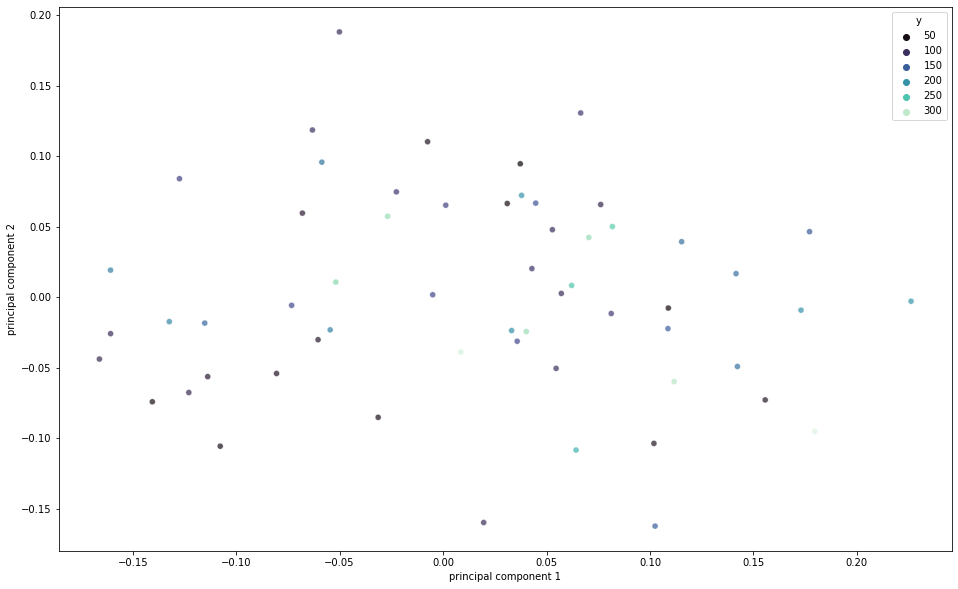

In [12]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",    
    data=principal_diabetes_Df,    
    alpha=0.7,
    palette="mako"
)

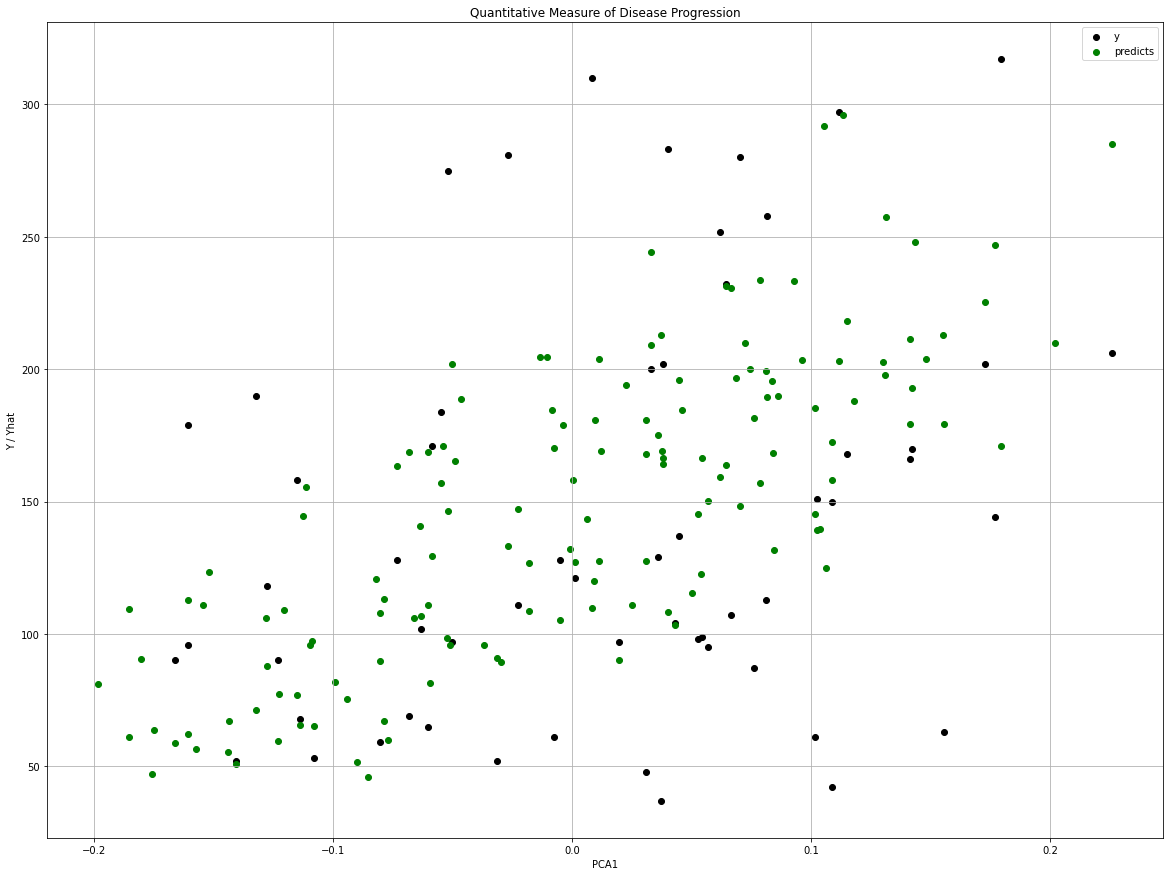

In [13]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 1", y="y",  color="black", data=principal_diabetes_Df)
plt.scatter(x="principal component 1", y="predicts", color="green", data=principal_diabetes_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Quantitative Measure of Disease Progression")
plt.xlabel('PCA1')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()

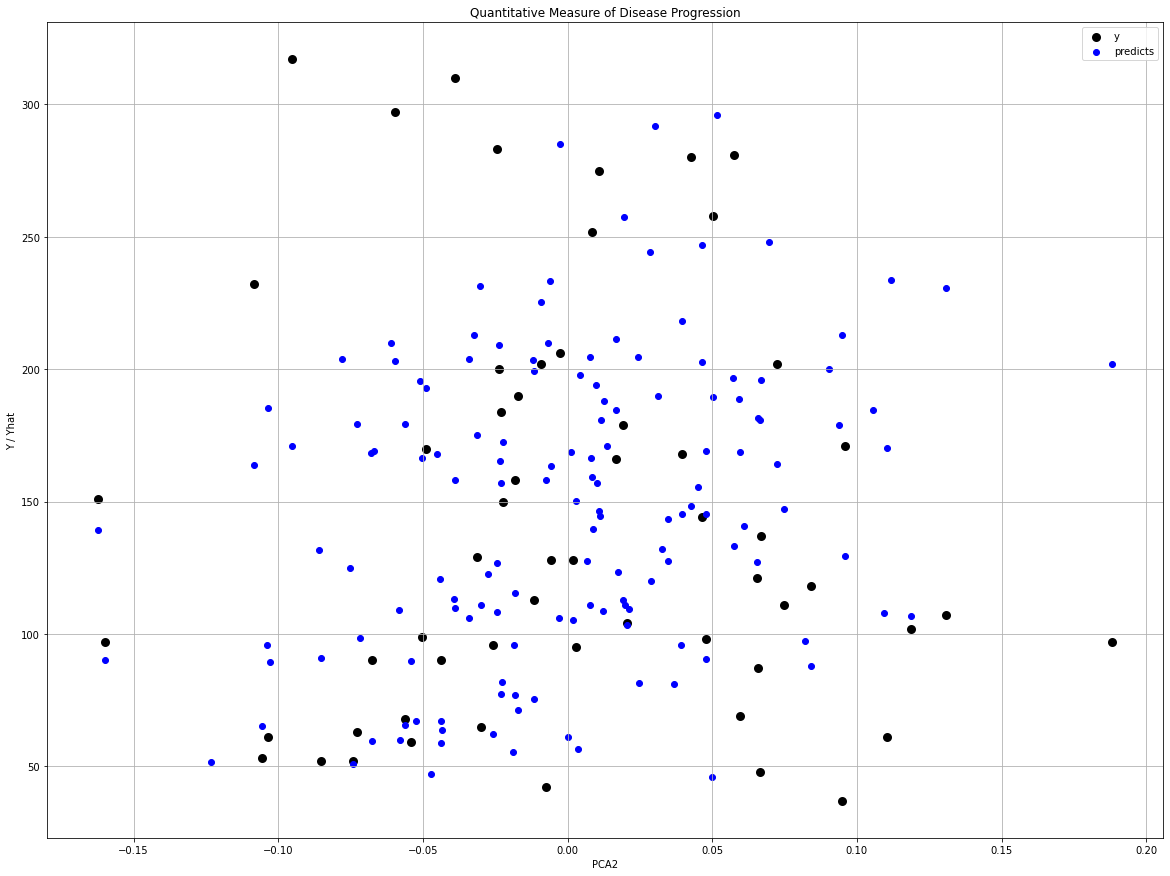

In [14]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 2", y="y",  color='black', linewidths=3, data=principal_diabetes_Df)
plt.scatter(x="principal component 2", y="predicts", color='blue', data=principal_diabetes_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Quantitative Measure of Disease Progression")
plt.xlabel('PCA2')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()